In [1]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.7 MB/s eta 0:00:00


In [2]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data = pd.read_csv("/content/drive/MyDrive/Research For Everyone/CSVFILES/Trainning_CSV_Files(ALL).csv")
test_data = pd.read_csv("/content/drive/MyDrive/Research For Everyone/CSVFILES/Testing_CSV_Files.csv")

In [5]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*")
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

In [6]:
train_data

,Image,Activity
0,arguing_image_1,Arguing
1,arguing_image_10,Arguing
2,arguing_image_100,Arguing
3,arguing_image_101,Arguing
4,arguing_image_102,Arguing
...,...,...
1432,Walking_image_95,Walking
1433,Walking_image_96,Walking
1434,Walking_image_97,Walking
1435,Walking_image_98,Walking


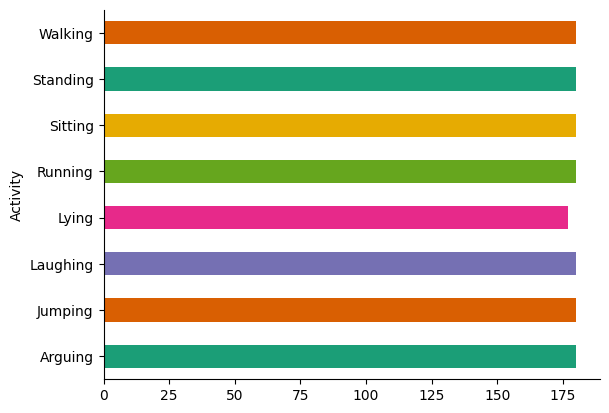

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
train_data.groupby('Activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
test_data

,Image
0,arguing_image_181
1,arguing_image_182
2,arguing_image_183
3,arguing_image_184
4,arguing_image_185
...,...
156,Walking_image_196
157,Walking_image_197
158,Walking_image_198
159,Walking_image_199


In [9]:
train_data.Activity.value_counts()

Activity
Arguing     180
Jumping     180
Laughing    180
Running     180
Sitting     180
Standing    180
Walking     180
Lying       177
Name: count, dtype: int64

In [10]:
import plotly.express as px
HAR = train_data.Activity.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [11]:
filename = train_data['Image']

situation = train_data['Activity']

In [12]:
filename

0         arguing_image_1
1        arguing_image_10
2       arguing_image_100
3       arguing_image_101
4       arguing_image_102
              ...        
1432     Walking_image_95
1433     Walking_image_96
1434     Walking_image_97
1435     Walking_image_98
1436     Walking_image_99
Name: Image, Length: 1437, dtype: object

In [13]:
situation

0       Arguing
1       Arguing
2       Arguing
3       Arguing
4       Arguing
         ...   
1432    Walking
1433    Walking
1434    Walking
1435    Walking
1436    Walking
Name: Activity, Length: 1437, dtype: object

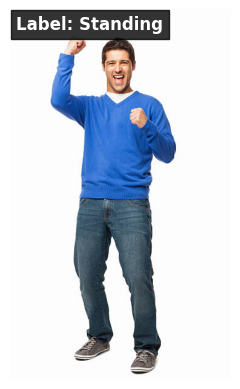

In [14]:

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_image_with_label(d):
    # List all files
    directory =d
    files = os.listdir(directory)

    # Filter only image files
    image_files = [file for file in files if file.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("No image files found in the directory.")
        return

    # Select a random image file
    random_image = random.choice(image_files)

    # Extract label from the filename
    label = random_image.split('_')[0]

    # Load and display the random image
    image_path = os.path.join(directory, random_image)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')

    # Display the label on the image
    plt.text(10, 10, f"Label: {label}", color='white', fontsize=12, weight='bold', ha='left', va='top', bbox=dict(facecolor='black', alpha=0.8))

    plt.show()

# Specify the directory containing your images in Google Drive
image_directory = "/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train"

# Display a random image from the specified directory with its label
display_random_image_with_label(image_directory)


In [15]:

directory = "/content/drive/MyDrive/Research For Everyone/Trainning/*"


class_folders = glob.glob(directory)

print("Class folders:")
for folder in class_folders:
    print(folder)



Class folders:
/content/drive/MyDrive/Research For Everyone/Trainning/Jumping_Train
/content/drive/MyDrive/Research For Everyone/Trainning/Laughing_Train
/content/drive/MyDrive/Research For Everyone/Trainning/Arguing_Train
/content/drive/MyDrive/Research For Everyone/Trainning/Standing_Train
/content/drive/MyDrive/Research For Everyone/Trainning/Sitting_Train
/content/drive/MyDrive/Research For Everyone/Trainning/Walking_Train
/content/drive/MyDrive/Research For Everyone/Trainning/Lying_Train
/content/drive/MyDrive/Research For Everyone/Trainning/Running_Train
/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train


In [16]:
# import glob

# # Define the directory containing your class folders
# train_directory = "/content/drive/MyDrive/Research For Everyone/Trainning/*"

# # Get the file paths of the class folders for training data
# train_folders = glob.glob(train_directory)

# # If you have a separate test directory, you can do the same for test data
# # Define the directory containing your test class folders
# test_directory = "/content/drive/MyDrive/Research For Everyone/Test/*"

# # Get the file paths of the class folders for test data
# # test_folders = glob.glob(test_directory)

# # Print the paths of the class folders
# print("Training class folders:")
# for folder in train_folders:
#     print(folder)

# # print("\nTesting class folders:")
# # for folder in test_folders:
# #     print(folder)


In [17]:
train_fol = glob.glob("/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/*")
test_fol = glob.glob("/content/drive/MyDrive/Research For Everyone/Test/Testing/*")

print(len(train_fol))
print(len(test_fol))

1440
161


In [18]:
train_fol

['/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Laughing_image_117.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Running_image_14.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Laughing_image_10.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Lying_image_62.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Lying_image_26.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Sitting_image_19.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Walking_image_136.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Laughing_image_100.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Running_image_54.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/arguing_image_65.jpg',
 '/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/Jumping_image_125.jpg',
 '/cont

In [19]:
from PIL import Image

img_data = []
img_label = []

for i in range(len(filename)):
    file_path = f"/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/{filename[i]}.jpg"

    if os.path.isfile(file_path):
        # Open image file
        temp_img = Image.open(file_path)
        # print(temp_img)

        resized_img = temp_img.resize((160, 160))
        # Convert image to numpy array and append to img_data

        img_data.append(np.array(resized_img))
        # print(img_data)
        # Append corresponding label to img_label
        img_label.append(situation[i])  # Assuming situation list has labels corresponding to filenames
        # print(img_label)
    else:
        print(f"File {file_path} not found. Skipping...")

# Convert img_data and img_label to numpy arrays
print(img_data[0])

img_data = np.array(img_data)
img_label = np.array(img_label)

# print(img_data)


[[[188 167 146]
  [210 193 176]
  [223 210 194]
  ...
  [239 226 209]
  [239 226 209]
  [238 225 208]]

 [[188 166 146]
  [210 192 175]
  [223 210 194]
  ...
  [239 226 209]
  [239 226 209]
  [238 225 208]]

 [[186 165 144]
  [208 191 174]
  [223 210 194]
  ...
  [239 226 209]
  [239 226 209]
  [238 225 208]]

 ...

 [[222 216 205]
  [222 216 206]
  [222 215 205]
  ...
  [207 198 183]
  [205 195 181]
  [204 191 181]]

 [[220 213 203]
  [221 214 204]
  [221 214 204]
  ...
  [204 195 180]
  [202 193 179]
  [202 188 179]]

 [[218 211 201]
  [220 213 203]
  [220 213 203]
  ...
  [201 192 177]
  [199 190 175]
  [200 186 177]]]


In [20]:
print(len(img_data))
print(img_data[0].shape)

1437
(160, 160, 3)


In [21]:
print(img_label)

['Arguing' 'Arguing' 'Arguing' ... 'Walking' 'Walking' 'Walking']


In [22]:
iii = img_data
iii = np.asarray(iii)
type(iii)
print(iii[0])

[[[188 167 146]
  [210 193 176]
  [223 210 194]
  ...
  [239 226 209]
  [239 226 209]
  [238 225 208]]

 [[188 166 146]
  [210 192 175]
  [223 210 194]
  ...
  [239 226 209]
  [239 226 209]
  [238 225 208]]

 [[186 165 144]
  [208 191 174]
  [223 210 194]
  ...
  [239 226 209]
  [239 226 209]
  [238 225 208]]

 ...

 [[222 216 205]
  [222 216 206]
  [222 215 205]
  ...
  [207 198 183]
  [205 195 181]
  [204 191 181]]

 [[220 213 203]
  [221 214 204]
  [221 214 204]
  ...
  [204 195 180]
  [202 193 179]
  [202 188 179]]

 [[218 211 201]
  [220 213 203]
  [220 213 203]
  ...
  [201 192 177]
  [199 190 175]
  [200 186 177]]]


In [23]:
from PIL import Image
import numpy as np
import os

img_data = []
img_label = []

for i in range(len(filename)):
    file_path = f"/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/{filename[i]}.jpg"

    if os.path.isfile(file_path):
        # Open image file
        temp_img = Image.open(file_path)

        # Resize image to 160x160
        resized_img = temp_img.resize((160, 160))
        # Convert image to numpy array and append to img_data
        img_data.append(np.array(resized_img))
        # Append corresponding label to img_label
        img_label.append(situation[i])  # Assuming situation list has labels corresponding to filenames
    else:
        print(f"File {file_path} not found. Skipping...")

# Convert img_data and img_label to numpy arrays if needed
img_data = np.array(img_data)
img_label = np.array(img_label)

# Iterate over img_data and print/visualize each image
for img in img_data:
    # Print the type of the image (should be numpy array)
    # print(type(img))
    # Display the image
    Image.fromarray(img).show()  # Show the image


In [24]:
y_train = to_categorical(np.asarray(train_data["Activity"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=8,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(8,activation="softmax"))

258076736/258076736 [==============================] - 2s 0us/step


In [28]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [29]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 2560)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1311232   
                                                                 
 dense_5 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 65413023 (249.53 MB)
Trainable params: 1315336 (5.02 MB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


In [30]:
history = efficientnet_model.fit(iii,y_train,epochs=40)

Epoch 1/40
45/45 [==============================] - 35s 182ms/step - loss: 0.9299 - accuracy: 0.6757
Epoch 2/40
45/45 [==============================] - 8s 180ms/step - loss: 0.3891 - accuracy: 0.8643
Epoch 3/40
45/45 [==============================] - 8s 180ms/step - loss: 0.2457 - accuracy: 0.9262
Epoch 4/40
45/45 [==============================] - 8s 184ms/step - loss: 0.1664 - accuracy: 0.9506
Epoch 5/40
45/45 [==============================] - 8s 183ms/step - loss: 0.1031 - accuracy: 0.9715
Epoch 6/40
45/45 [==============================] - 8s 187ms/step - loss: 0.0793 - accuracy: 0.9819
Epoch 7/40
45/45 [==============================] - 8s 188ms/step - loss: 0.0741 - accuracy: 0.9784
Epoch 8/40
45/45 [==============================] - 9s 190ms/step - loss: 0.0635 - accuracy: 0.9819
Epoch 9/40
45/45 [==============================] - 9s 201ms/step - loss: 0.0687 - accuracy: 0.9777
Epoch 10/40
45/45 [==============================] - 9s 191ms/step - loss: 0.0653 - accuracy: 0.981

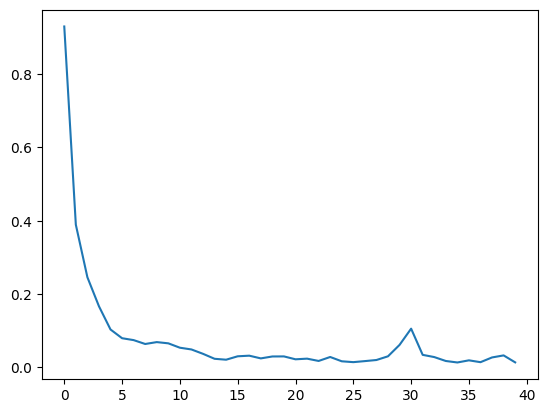

In [31]:
losses = history.history["loss"]
plt.plot(losses)


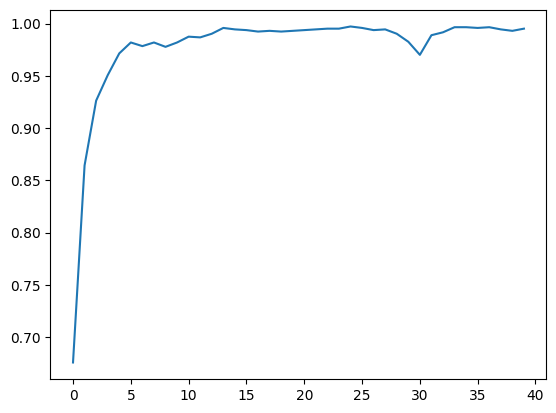

In [32]:
acc = history.history['accuracy']
plt.plot(acc)

In [33]:
train_fol = glob.glob("/content/drive/MyDrive/Research For Everyone/Trainning/ALL_Train/*")
test_fol = glob.glob("/content/drive/MyDrive/Research For Everyone/Test/Testing/*")

print(len(train_fol))
print(len(test_fol))

1440
161


In [34]:
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [36]:
# test_predict("/content/drive/MyDrive/Research For Everyone/Test/Testing/Walking_image_195.jpg")

1/1 [==============================] - 0s 337ms/step
Predicted Class: Laughing
Probability: 99.93964433670044 %


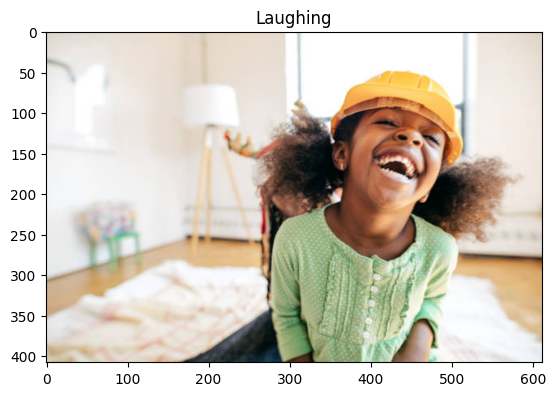

1/1 [==============================] - 0s 206ms/step
Predicted Class: Running
Probability: 99.9996542930603 %


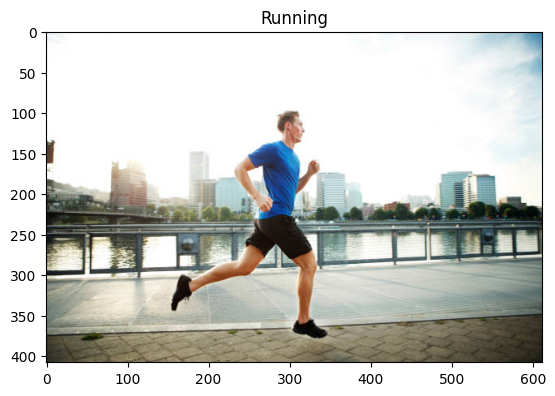

1/1 [==============================] - 0s 133ms/step
Predicted Class: Arguing
Probability: 99.97170567512512 %


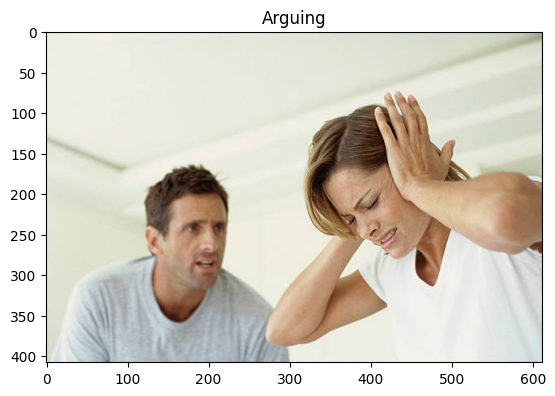

1/1 [==============================] - 0s 82ms/step
Predicted Class: Sitting
Probability: 99.99958276748657 %


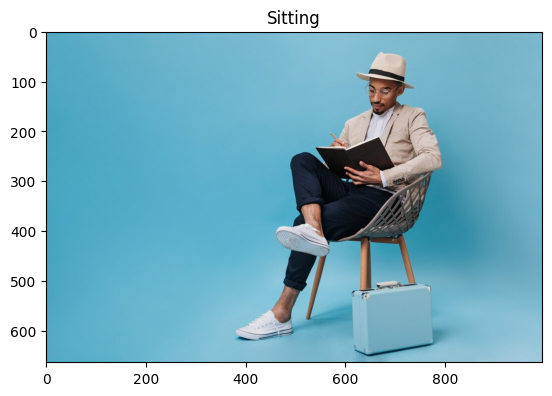

In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Rename the module to avoid conflict

# Define a dictionary mapping class indices to their labels
class_labels = {
    0: "Arguing",
    1: "Jumping",
    2: "Laughing",
    3: "Lying",
    4: "Running",
    5: "Sitting",
    6: "Standing",
    7: "Walking"
}

def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

def test_predict(test_image):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    # Get the predicted class index
    predicted_index = np.argmax(result)

    # Map the predicted index to its corresponding class label
    predicted_label = class_labels[predicted_index]

    # Print the predicted class label and probability
    print("Predicted Class:", predicted_label)
    print("Probability:", np.max(result) * 100, "%")

    # Display the original image with the predicted class label as the title
    image = mpimg.imread(test_image)
    plt.imshow(image)
    plt.title(predicted_label)
    plt.show()

# Call the test_predict function with the path of the test image
test_predict("/content/drive/MyDrive/Research For Everyone/Test/Testing/Laughing_image_182.jpg")
test_predict("/content/drive/MyDrive/Research For Everyone/Test/Testing/Running_image_195.jpg")
test_predict("/content/drive/MyDrive/Research For Everyone/Test/Testing/arguing_image_199.jpg")
test_predict("/content/drive/MyDrive/Research For Everyone/Test/Testing/Sitting_image_188.jpg")
